<a href="https://colab.research.google.com/github/ella417/NLP/blob/main/250522_3_language_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

def read_txt(txt_path):
  with open(txt_path, 'r') as f:
    txt_string = f.readlines()
  return txt_string

# Language modeling

In [2]:
!wget "https://raw.githubusercontent.com/karpathy/makemore/master/names.txt"

--2025-05-27 04:50:37--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.02s   

2025-05-27 04:50:37 (13.6 MB/s) - ‘names.txt’ saved [228145/228145]



In [3]:
txt_string = read_txt('names.txt')

In [4]:
names_list = [x.replace('\n', '') for x in txt_string]
len(names_list)

32033

In [5]:
# names_list

# N-Gram
- Start with bi-gram (2-gram)

In [6]:
from collections import defaultdict

# bigram_dict = {}
bigram_dict = defaultdict(int) # If key is not in the defaultdict, it automatically assign key and empty value (int=0, list=[])
unigram_dict = defaultdict(int)

# RNN
- $h_t = \tanh(\textbf{W}_{hh}h_{t-1} + \textbf{W}_{xh}x_t + b) $
  - $\textbf{W}$: Weight Matrix
  - $b$: bias
  - $x_t$: input vector of time step $t$
  - $h_t$: hidden state (and also output) of time step $t$


In [7]:
torch.manual_seed(0)
sequence_length = 7
input_dim, hidden_dim = 3, 5
weight_hh = nn.Linear(hidden_dim, hidden_dim)
weight_xh = nn.Linear(input_dim, hidden_dim)
h0 = torch.zeros(hidden_dim)
x = torch.randn([sequence_length, input_dim])
t = 0
x_t = x[t]
x[t]

tensor([ 1.0554,  0.1778, -0.2303])

In [8]:
h_t = torch.tanh(weight_hh(h0)+weight_xh(x_t))
h_t

tensor([-0.3031,  0.4942, -0.3826, -0.1671, -0.0307], grad_fn=<TanhBackward0>)

In [9]:
def run_rnn_cell(weight_hh, weight_xh, prev_h, x_t):
  return torch.tanh(weight_hh(prev_h)+weight_xh(x_t))

output = []
prev_h = h0
for i in range(len(x)):
  print(f"x: {x[i]}")
  h = run_rnn_cell(weight_hh, weight_xh, prev_h, x[i])
  prev_h = h
  output.append(h)
  print(f"h: {h}")

output = torch.stack(output)
output

x: tensor([ 1.0554,  0.1778, -0.2303])
h: tensor([-0.3031,  0.4942, -0.3826, -0.1671, -0.0307], grad_fn=<TanhBackward0>)
x: tensor([-0.3918,  0.5433,  0.3356])
h: tensor([ 0.2949,  0.2907,  0.5566, -0.6004, -0.4537], grad_fn=<TanhBackward0>)
x: tensor([1.5091, 2.0820, 1.7067])
h: tensor([-0.0504, -0.8319,  0.6891, -0.0811, -0.9549], grad_fn=<TanhBackward0>)
x: tensor([ 2.3804, -1.1256, -0.3170])
h: tensor([-0.9035,  0.7153, -0.9110,  0.4101,  0.4610], grad_fn=<TanhBackward0>)
x: tensor([-1.0925,  0.8058,  0.3276])
h: tensor([ 0.5157,  0.1567,  0.7691, -0.8519, -0.4661], grad_fn=<TanhBackward0>)
x: tensor([-0.7607, -1.5991,  0.0185])
h: tensor([-0.6471,  0.9578, -0.5932, -0.2097,  0.4347], grad_fn=<TanhBackward0>)
x: tensor([-0.7504,  0.1854,  0.6211])
h: tensor([ 0.2194,  0.3107,  0.5832, -0.7386, -0.3476], grad_fn=<TanhBackward0>)


tensor([[-0.3031,  0.4942, -0.3826, -0.1671, -0.0307],
        [ 0.2949,  0.2907,  0.5566, -0.6004, -0.4537],
        [-0.0504, -0.8319,  0.6891, -0.0811, -0.9549],
        [-0.9035,  0.7153, -0.9110,  0.4101,  0.4610],
        [ 0.5157,  0.1567,  0.7691, -0.8519, -0.4661],
        [-0.6471,  0.9578, -0.5932, -0.2097,  0.4347],
        [ 0.2194,  0.3107,  0.5832, -0.7386, -0.3476]],
       grad_fn=<StackBackward0>)

In [10]:
names_list[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [11]:
entire_chars = []

for name in names_list:
  for char in name:
    entire_chars.append(char)

len(entire_chars)

196113

In [12]:
set(entire_chars)
vocab = list(set(entire_chars))
vocab.sort()

char2idx = {char: i for i, char in enumerate(vocab)}
char2idx

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

## Define Dataset Class

In [13]:
class NameSet:
  def __init__(self, txt_fn):
    txt_string = read_txt(txt_fn)
    names_list = [x.replace("\n", '') for x in txt_string]
    self.data = names_list
    entire_chars = []
    for name in names_list:
      for char in name:
        entire_chars.append(char)

    self.vocab = list(set(entire_chars))
    self.vocab.sort()

    special_tokens = ['<pad>', '<start>', '<end>']
    self.vocab = special_tokens+self.vocab
    self.char2idx = {char: i for i, char in enumerate(self.vocab)}
  def __len__(self):
    return len(self.data)
  def __getitem__(self, idx):
    name_string = self.data[idx]
    name_in_idx = [self.char2idx[char] for char in name_string]
    name_in_idx = [self.char2idx['<start>']] + name_in_idx + [self.char2idx['<end>']]

    model_input = name_in_idx[:-1]
    target_output = name_in_idx[1:]
    return model_input, target_output


dataset = NameSet('names.txt')
dataset.data[0]
len(dataset)
print(dataset.vocab)
dataset[0]
len(dataset.vocab)

['<pad>', '<start>', '<end>', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


29

In [14]:
name = 'emma' #. 4, 12, 12, 0
char2idx = dataset.char2idx

for char in name:
  print(char, char2idx[char])

[char2idx[char] for char in name] # tokenizing string to tokens

e 7
m 15
m 15
a 3


[7, 15, 15, 3]

## Define the model
- Model Architecture
  - Embedding Layer: Convert character to vector
  - RNN Layer: Process the input sequence
  - Linear Layer: Output the logits for the probability of the next character
  - Softmax Layer: Convert the logits to probability

- Forward Pass:
  - Assume the input is a sequence of characters
    - We call it "teacher-forcing". We feed the target output to the model as the input
  - Flow: Embedding -> RNN -> Linear -> Softmax



In [15]:
import torch.nn as nn
class LanguageModel(nn.Module):
  def __init__(self, vocab_size,embedding_dim=16):
    super().__init__()
    self.vocab_size = vocab_size
    self.emb = nn.Embedding(embedding_dim=embedding_dim,num_embeddings=self.vocab_size)
    self.rnn = nn.GRU(input_size=embedding_dim,hidden_size=2*embedding_dim, batch_first = True)

    self.proj = nn.Linear(in_features= 2*embedding_dim, out_features= vocab_size)

  def forward(self, x):
    x = self.emb(x)
    x,last_hidden = self.rnn(x)
    self.proj
    x = self.proj(x)
    x = torch.softmax(x, dim=1)
    return x
vocab_size = len(dataset.vocab)
model=LanguageModel(vocab_size)
model.emb.weight

x,y = dataset[0]
x = torch.tensor(x)
print(x)
print(model(x).shape)
model(x)

tensor([ 1,  7, 15, 15,  3])
torch.Size([5, 29])


tensor([[0.0435, 0.0353, 0.0337, 0.0384, 0.0331, 0.0350, 0.0284, 0.0374, 0.0393,
         0.0368, 0.0298, 0.0337, 0.0297, 0.0372, 0.0387, 0.0279, 0.0380, 0.0412,
         0.0285, 0.0354, 0.0322, 0.0392, 0.0364, 0.0304, 0.0379, 0.0285, 0.0330,
         0.0280, 0.0333],
        [0.0409, 0.0335, 0.0454, 0.0313, 0.0343, 0.0304, 0.0235, 0.0459, 0.0394,
         0.0379, 0.0317, 0.0303, 0.0278, 0.0381, 0.0411, 0.0296, 0.0313, 0.0340,
         0.0295, 0.0349, 0.0362, 0.0388, 0.0361, 0.0317, 0.0393, 0.0291, 0.0355,
         0.0274, 0.0350],
        [0.0457, 0.0299, 0.0402, 0.0285, 0.0329, 0.0328, 0.0300, 0.0430, 0.0400,
         0.0332, 0.0393, 0.0312, 0.0261, 0.0303, 0.0379, 0.0269, 0.0249, 0.0358,
         0.0336, 0.0416, 0.0349, 0.0447, 0.0397, 0.0319, 0.0416, 0.0315, 0.0362,
         0.0232, 0.0323],
        [0.0463, 0.0287, 0.0393, 0.0277, 0.0333, 0.0331, 0.0328, 0.0418, 0.0387,
         0.0315, 0.0428, 0.0310, 0.0261, 0.0279, 0.0384, 0.0258, 0.0220, 0.0348,
         0.0362, 0.0456, 0.0346

## Define Collate Function
- As the input is a list of arbitrary length, we need to pad them to the same length
- You can feed collate function to the DataLoader
  - ```dataloader = DataLoader(dataset, batch_size=10, collate_fn=collate_fn)```

In [16]:
from torch.utils.data import DataLoader

def collate(raw_batch):
  # for x,t in raw_batch
  x = [item[0] for item in raw_batch]
  y = [item[1] for item in raw_batch]

  length_name = max([len(name) for name in x])
  num_pad = [length_name - len(name) for name in x]
  # num_pad[]
  # for name in x :
  #   num_pad.append(length_name - len(name))
  pad_x = []
  pad_y = []
  for name, name_y, pad in zip(x, y, num_pad) :
    # print(name, name_y, pad)
    paded_name = name + [0] * pad
    paded_name_y = name_y + [0] * pad

    pad_x.append(paded_name)
    pad_y.append(paded_name_y)

#  pad_x = torch.zeros(len(raw_batch), length_name, dtype=torch.long)
#  for i, name in enumerate(x):
#    pad_x[i, len(name)] = torch.tensor(name)

  x = pad_x
  y = pad_y

  # print(num_pad)
  # print(length_name)
  return torch.tensor(x), torch.tensor(y)

dataloader = DataLoader(dataset, batch_size = 8, collate_fn = collate)

for batch in dataloader:
  # [dataset[idx] for idx in [0,1,2]]
  print(batch)
  break

(tensor([[ 1,  7, 15, 15,  3,  0,  0,  0,  0,  0],
        [ 1, 17, 14, 11, 24, 11,  3,  0,  0,  0],
        [ 1,  3, 24,  3,  0,  0,  0,  0,  0,  0],
        [ 1, 11, 21,  3,  4,  7, 14, 14,  3,  0],
        [ 1, 21, 17, 18, 10, 11,  3,  0,  0,  0],
        [ 1,  5, 10,  3, 20, 14, 17, 22, 22,  7],
        [ 1, 15, 11,  3,  0,  0,  0,  0,  0,  0],
        [ 1,  3, 15,  7, 14, 11,  3,  0,  0,  0]]), tensor([[ 7, 15, 15,  3,  2,  0,  0,  0,  0,  0],
        [17, 14, 11, 24, 11,  3,  2,  0,  0,  0],
        [ 3, 24,  3,  2,  0,  0,  0,  0,  0,  0],
        [11, 21,  3,  4,  7, 14, 14,  3,  2,  0],
        [21, 17, 18, 10, 11,  3,  2,  0,  0,  0],
        [ 5, 10,  3, 20, 14, 17, 22, 22,  7,  2],
        [15, 11,  3,  2,  0,  0,  0,  0,  0,  0],
        [ 3, 15,  7, 14, 11,  3,  2,  0,  0,  0]]))


## Define the split function
- Split the dataset into training and validation set
- You can use ```torch.utils.data.random_split``` function
  - ```train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])```


In [17]:
train_size = int(len(dataset) * 0.9)
val_size = len(dataset) - train_size
print(train_size, val_size)
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

28829 3204


## Define Training Loop
- Define the loss function
  - Negative Log Likelihood Loss: Consider that we are using padding tokens as well
- Define the loss using the loss function
- Save the loss value

In [18]:
x, y = dataset[0]
x = torch.tensor(x)
y = torch.tensor(y)
prediction = model(x)
print(y)

prediction

prob_of_correct_char = prediction[torch.arange(len(y)),y]
prob_of_correct_char
nll = -torch.log(prob_of_correct_char)
nll.mean()

tensor([ 7, 15, 15,  3,  2])


tensor(3.4748, grad_fn=<MeanBackward0>)

In [19]:
train_loader = DataLoader(train_dataset, batch_size = 8, collate_fn = collate, shuffle = True)
batch = next(iter(train_loader))
# iterater
x, y = batch
prediction = model(x)
batch_size, seq_length, vocab_size = prediction.shape # batch_size, seq_length, vocab_size
prediction = prediction.reshape(batch_size * seq_length, vocab_size)
y = y.reshape(-1)
print(prediction.shape, y.shape)
prob_of_correct_char = prediction[torch.arange(len(y)), y]

torch.Size([80, 29]) torch.Size([80])


In [24]:
y.shape

torch.Size([80])

In [23]:
prob_of_correct_char.shape

torch.Size([80])

In [28]:
new_prob = []

for i in range (len(y)):
  if y[i] == 0:
    continue
  else:
    new_prob.append(prob_of_correct_char[i])

new_prob = torch.stack(new_prob)
new_prob

tensor([0.1050, 0.1095, 0.0901, 0.0826, 0.0929, 0.1132, 0.0908, 0.1000, 0.1039,
        0.0951, 0.1024, 0.1144, 0.0928, 0.1057, 0.0908, 0.1062, 0.1058, 0.0902,
        0.1156, 0.1085, 0.1048, 0.1007, 0.0971, 0.1133, 0.1001, 0.1042, 0.1065,
        0.1080, 0.0997, 0.1090, 0.0893, 0.0960, 0.0890, 0.1178, 0.0959, 0.1262,
        0.0764, 0.1124, 0.0846, 0.0898, 0.1059, 0.0921, 0.0981, 0.1015, 0.1032,
        0.0937, 0.1014, 0.1132, 0.1033, 0.1180, 0.0926, 0.0990, 0.1004, 0.0953,
        0.0921, 0.1148, 0.1011, 0.0916, 0.1100, 0.1038, 0.1048, 0.0898],
       grad_fn=<StackBackward0>)

In [30]:
y != 0
prob_of_correct_char[y != 0]

tensor([0.1050, 0.1095, 0.0901, 0.0826, 0.0929, 0.1132, 0.0908, 0.1000, 0.1039,
        0.0951, 0.1024, 0.1144, 0.0928, 0.1057, 0.0908, 0.1062, 0.1058, 0.0902,
        0.1156, 0.1085, 0.1048, 0.1007, 0.0971, 0.1133, 0.1001, 0.1042, 0.1065,
        0.1080, 0.0997, 0.1090, 0.0893, 0.0960, 0.0890, 0.1178, 0.0959, 0.1262,
        0.0764, 0.1124, 0.0846, 0.0898, 0.1059, 0.0921, 0.0981, 0.1015, 0.1032,
        0.0937, 0.1014, 0.1132, 0.1033, 0.1180, 0.0926, 0.0990, 0.1004, 0.0953,
        0.0921, 0.1148, 0.1011, 0.0916, 0.1100, 0.1038, 0.1048, 0.0898],
       grad_fn=<IndexBackward0>)

In [31]:
prediction = model(x)

def get_loss(prediction, y):
  batch_size, seq_length, vocab_size = prediction.shape # batch_size, seq_length, vocab_size
  prediction = prediction.reshape(batch_size * seq_length, vocab_size)
  y = y.reshape(-1)
  prob_of_correct_char = prediction[torch.arange(len(y)), y]
  prob_of_correct_char = prob_of_correct_char[y != 0]
  nll = -torch.log(prob_of_correct_char + 1e-8).mean()

  return nll

get_loss(prediction, y)

tensor(2.2972, grad_fn=<NegBackward0>)

In [36]:
from tqdm.auto import tqdm
device = 'cuda'
model = LanguageModel(vocab_size)

model.to(device)

optimizer = torch.optim.Adam(model.parameters())

train_loader = DataLoader(train_dataset, batch_size = 64, collate_fn = collate, shuffle = True)

loss_record = []
n_epoch = 10
for i in range(n_epoch):
  for batch in tqdm(train_loader):
    x, y = batch
    pred = model(x.to(device))
    loss = get_loss(pred, y.to(device))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_record.append(loss.item()) # don't forget to .item

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

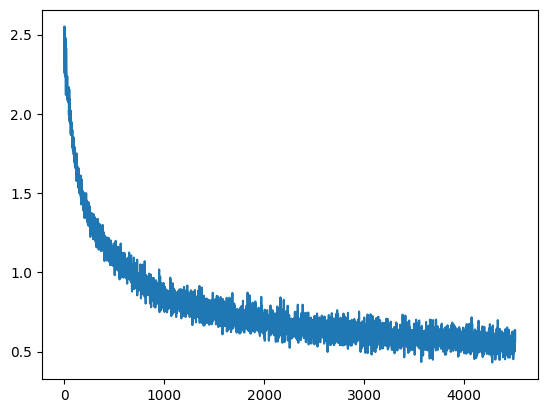

In [37]:
import matplotlib.pyplot as plt
plt.plot(loss_record)

In [ ]:
# 교수님이 뭐 수정했는데 내가 카톡하느라 안 들었음 동영상 다시 보고 다시 체크하기

## Define the Inference
- Unlike the training, we don't have the target output in the inference
- We need to feed the model with the previous character and get the next character as the output
  - We have to "sample" the next character from the model.
    - For this, we can use the ```torch.multinomial``` function
    - ```torch.multinomial(logits, num_samples=1)```
    - This function will sample the next character from the logits
    - We can use this function to sample the next character in the inference loop


In [39]:
in_token = [1]
x = torch.tensor(in_token).unsqueeze(0)



tensor([[1]])